<a href="https://colab.research.google.com/github/ara42/Deep-Learning/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


강의 교재 : https://wikibook.co.kr/mymlrev/

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense, LSTM, Dropout, Embedding
from keras import models
from keras.datasets import imdb
from keras.utils import pad_sequences

## 워드 임베딩

In [50]:
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=30000)

In [51]:
xseq_train = pad_sequences(x_train,maxlen=150)
xseq_test = pad_sequences(x_test,maxlen=150)

In [52]:
xseq_train.shape

(25000, 150)

In [53]:
em = Embedding(30000,16,input_length=150)
model = keras.Sequential()
model.add(em)
model.add(LSTM(20))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 150, 16)           480000    
                                                                 
 lstm_7 (LSTM)               (None, 20)                2960      
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 482,981
Trainable params: 482,981
Non-trainable params: 0
_________________________________________________________________


In [54]:
from keras.utils.tf_utils import validate_axis
es = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
hist = model.fit(xseq_train, y_train, callbacks=[es], validation_split=0.2, epochs=1000)

Epoch 1/1000
625/625 [==============================] - 43s 65ms/step - loss: 0.5031 - accuracy: 0.7401 - val_loss: 0.3428 - val_accuracy: 0.8600
Epoch 2/1000
625/625 [==============================] - 53s 84ms/step - loss: 0.2809 - accuracy: 0.8883 - val_loss: 0.3192 - val_accuracy: 0.8704
Epoch 3/1000
625/625 [==============================] - 39s 62ms/step - loss: 0.2173 - accuracy: 0.9189 - val_loss: 0.3054 - val_accuracy: 0.8708
Epoch 4/1000
625/625 [==============================] - 43s 69ms/step - loss: 0.1845 - accuracy: 0.9325 - val_loss: 0.3079 - val_accuracy: 0.8654
Epoch 5/1000
625/625 [==============================] - 50s 80ms/step - loss: 0.1585 - accuracy: 0.9444 - val_loss: 0.4256 - val_accuracy: 0.8598
Epoch 6/1000
625/625 [==============================] - 46s 74ms/step - loss: 0.1358 - accuracy: 0.9538 - val_loss: 0.3940 - val_accuracy: 0.8690
Epoch 7/1000
625/625 [==============================] - 47s 75ms/step - loss: 0.1200 - accuracy: 0.9589 - val_loss: 0.3716 -

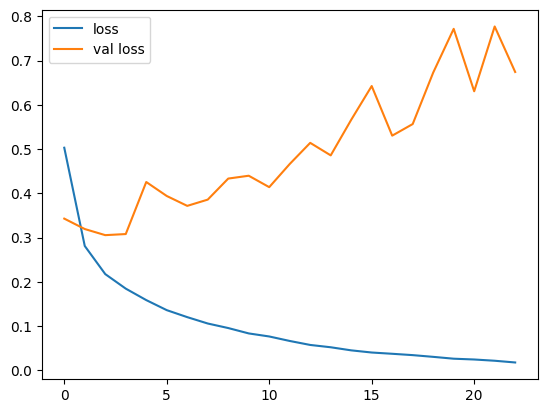

In [55]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [46]:
em = Embedding(30000,16,input_length=150)
model = keras.Sequential()
model.add(em)
model.add(LSTM(20))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss=keras.losses.binary_crossentropy,
              metrics=['accuracy'])
model.summary()
es = keras.callbacks.EarlyStopping(patience=20,
                                   restore_best_weights=True)
hist = model.fit(xseq_train,y_train,callbacks=[es],
                 validation_split=0.2,
                 epochs=1000)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 150, 16)           480000    
                                                                 
 lstm_6 (LSTM)               (None, 20)                2960      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 21        
                                                                 
Total params: 482,981
Trainable params: 482,981
Non-trainable params: 0
_________________________________________________________________
Epoch 1/1000
625/625 [==============================] - 42s 62ms/step - loss: 0.4854 - accuracy: 0.7577 - val_loss: 0.3361 - val_accuracy: 0.8558
Epoch 2/1000
625/625 [============

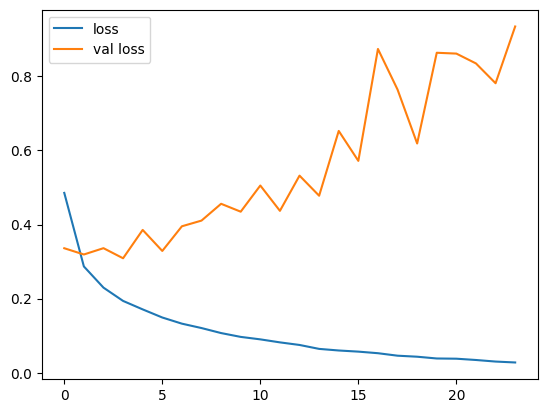

In [47]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

## 시계열 데이터 예측

In [113]:
path = '/content/drive/MyDrive/Colab Notebooks/Deep-Learning/iap.csv'

In [114]:
df = pd.read_csv(path, header=None)
df.columns = ['date','passenger']
df.head()

,date,passenger
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


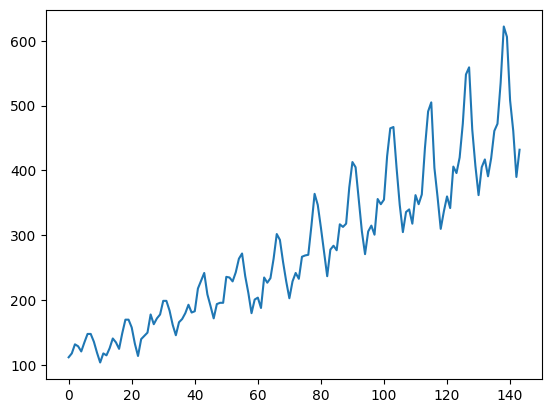

In [115]:
plt.plot(df['passenger'])
plt.show()

In [116]:
x = []
y = []
src = df['passenger']
n = len(src)
for i in range(n-12):
    x.append(src[i:i+12])
    y.append(src[i+12])
x = np.array(x)
y = np.array(y)
x.shape, y.shape

((132, 12), (132,))

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [119]:
model = keras.Sequential()
model.add(Input(shape=(12,1)))
model.add(LSTM(10))
model.add(Dense(5,activation='relu'))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss = 'mse', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 10)                480       
                                                                 
 dense_20 (Dense)            (None, 5)                 55        
                                                                 
 dense_21 (Dense)            (None, 1)                 6         
                                                                 
Total params: 541
Trainable params: 541
Non-trainable params: 0
_________________________________________________________________


In [120]:
es = keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)
hist = model.fit(x_train, y_train, callbacks=[es], validation_split=0.2, epochs=10000)

Epoch 1/10000
3/3 [==============================] - 4s 450ms/step - loss: 99860.2266 - accuracy: 0.0000e+00 - val_loss: 110528.5234 - val_accuracy: 0.0000e+00
Epoch 2/10000
3/3 [==============================] - 0s 45ms/step - loss: 99853.4062 - accuracy: 0.0000e+00 - val_loss: 110513.0000 - val_accuracy: 0.0000e+00
Epoch 3/10000
3/3 [==============================] - 0s 37ms/step - loss: 99830.9219 - accuracy: 0.0000e+00 - val_loss: 110447.3906 - val_accuracy: 0.0000e+00
Epoch 4/10000
3/3 [==============================] - 0s 45ms/step - loss: 99755.9531 - accuracy: 0.0000e+00 - val_loss: 110340.8516 - val_accuracy: 0.0000e+00
Epoch 5/10000
3/3 [==============================] - 0s 44ms/step - loss: 99667.9062 - accuracy: 0.0000e+00 - val_loss: 110274.5000 - val_accuracy: 0.0000e+00
Epoch 6/10000
3/3 [==============================] - 0s 50ms/step - loss: 99614.2422 - accuracy: 0.0000e+00 - val_loss: 110234.5781 - val_accuracy: 0.0000e+00
Epoch 7/10000
3/3 [==========================

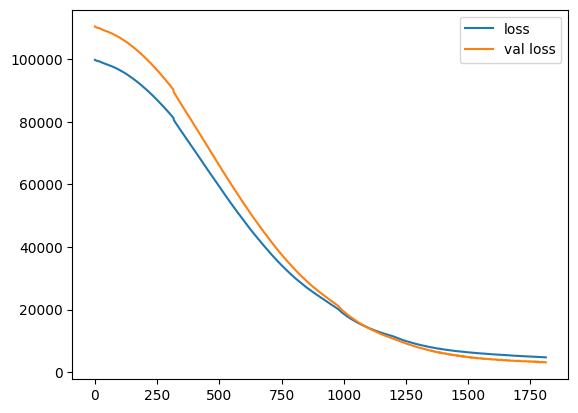

In [121]:
plt.plot(hist.history['loss'],label='loss')
plt.plot(hist.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [125]:
pred = model.predict(x_test)

2/2 [==============================] - 0s 10ms/step


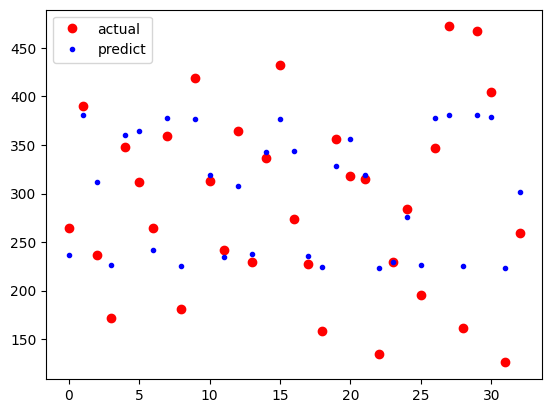

In [126]:
plt.plot(y_test,'ro',label='actual')
plt.plot(pred,'b.',label='predict')
plt.legend()
plt.show()

In [127]:
pred = model.predict(x)

5/5 [==============================] - 0s 7ms/step


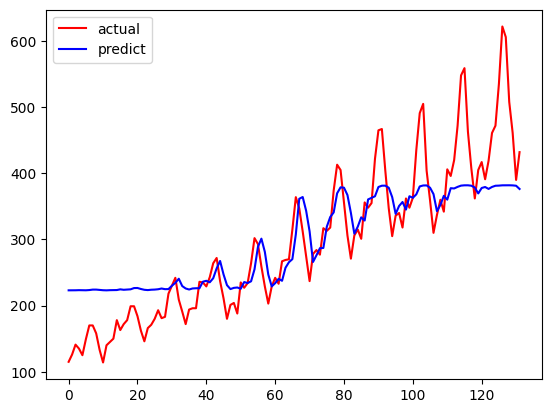

In [128]:
plt.plot(y,'r',label='actual')
plt.plot(pred,'b',label='predict')
plt.legend()
plt.show()

## 주식 데이터

In [90]:
path = '/content/drive/MyDrive/Colab Notebooks/Deep-Learning/000080.csv'
df = pd.read_csv(path)
df.shape

(250, 11)

In [91]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volumn', 'AdjOpen', 'AdjHigh',
       'AdjLow', 'AdjClose', 'AdjVolumn'],
      dtype='object')

In [92]:
df.describe()

,Open,High,Low,Close,Volumn,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolumn
count,250.000000,250.000000,0.0,0.0,0.0,0.0,250.000000,0.0,0.0,0.0
mean,32907.800000,33560.600000,NaN,NaN,NaN,NaN,32749.746237,NaN,NaN,NaN
std,6304.649362,6379.377986,NaN,NaN,NaN,NaN,6405.017730,NaN,NaN,NaN
min,21800.000000,22850.000000,NaN,NaN,NaN,NaN,21700.000000,NaN,NaN,NaN
25%,28012.500000,28500.000000,NaN,NaN,NaN,NaN,27555.913950,NaN,NaN,NaN
50%,29750.000000,30375.000000,NaN,NaN,NaN,NaN,29618.638000,NaN,NaN,NaN
75%,37775.000000,38500.000000,NaN,NaN,NaN,NaN,37987.500000,NaN,NaN,NaN
max,46000.000000,47050.000000,NaN,NaN,NaN,NaN,46500.000000,NaN,NaN,NaN


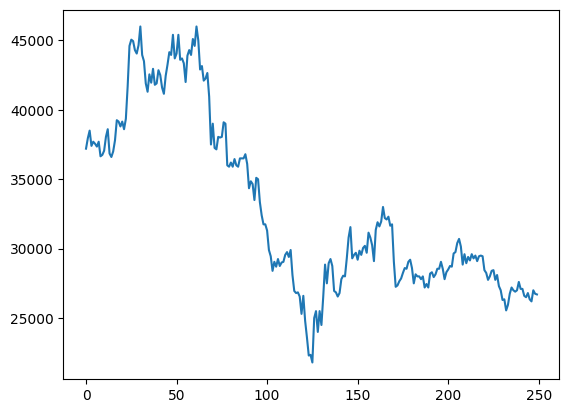

In [93]:
src = df['Open']
plt.plot(src)
plt.show()

In [94]:
x = []
y = []
period = 5
n = len(src)
for i in range(n-period):
    x.append(src[i:i+period])
    y.append(src[i+period])
x = np.array(x)
y = np.array(y)
x.shape, y.shape

((245, 5), (245,))

In [95]:
model = keras.Sequential()
model.add(Input(shape=(5,1)))
model.add(LSTM(3))
model.add(Dense(1,activation='relu'))
model.compile(optimizer='adam',loss = 'mse')
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 3)                 60        
                                                                 
 dense_17 (Dense)            (None, 1)                 4         
                                                                 
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________


In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [64]:
#미완성
es = keras.callbacks.EarlyStopping(patience=50, restore_best_weights=True)
hist = model.fit(x_train, y_train, callbacks=[es], validation_split=0.2, epochs=10000)

Epoch 1/10000
5/5 [==============================] - 7s 231ms/step - loss: 1097857664.0000 - val_loss: 1069966336.0000
Epoch 2/10000
5/5 [==============================] - 0s 31ms/step - loss: 1097857664.0000 - val_loss: 1069966336.0000
Epoch 3/10000
5/5 [==============================] - 0s 33ms/step - loss: 1097857664.0000 - val_loss: 1069966336.0000
Epoch 4/10000
5/5 [==============================] - 0s 23ms/step - loss: 1097857664.0000 - val_loss: 1069966336.0000
Epoch 5/10000
5/5 [==============================] - 0s 23ms/step - loss: 1097857664.0000 - val_loss: 1069966336.0000
Epoch 6/10000
5/5 [==============================] - 0s 23ms/step - loss: 1097857664.0000 - val_loss: 1069966336.0000
Epoch 7/10000
5/5 [==============================] - 0s 20ms/step - loss: 1097857664.0000 - val_loss: 1069966336.0000
Epoch 8/10000
5/5 [==============================] - 0s 25ms/step - loss: 1097857664.0000 - val_loss: 1069966336.0000
Epoch 9/10000
5/5 [==============================] - 0s